In [1]:
using Interpolations
using Distributed
using DataFrames
using Printf
using JLD
using CSV
using Dierckx
using Dates
using PyPlot
# using PyCall
using Seaborn
using LaTeXStrings

main_path = "/home/artur/BondPricing"
module_path = string(main_path, "/", "Julia/modules/")
modls = ["Batch", "ModelObj", "AnalyticFunctions", 
         "BondPrInterp", "EqFinDiff", "ModelPlots"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end
ENV["LINES"] = 750

750

# SVM HeatMaps and Surfaces

In [2]:
main_path = "/home/artur/BondPricing"
module_path = string(main_path, "/", "Julia/modules/")
modls = ["Batch", "ModelObj", "AnalyticFunctions", 
         "BondPrInterp", "EqFinDiff", "ModelPlots"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

In [2]:
bt = Batch.BatchObj()
pt = ModelPlots.PlotsObj(bt; svm_m =1.)

Loading optimal results dataframe...
Main.Batch.BatchStruct
  model: String "svm"
  dfn: Main.Batch.DirFileNames
  dfc: Main.Batch.BatchDFColumns
  mi: Main.Batch.ModelInputs
  bp: Main.Batch.BatchParams
  coupon_grid: Array{Float64}((22,)) [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0  …  6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0]
  pvb_tol_vec: Array{Float64}((4,)) [1.0e-6, 1.0e-5, 0.0001, 0.001]

Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...


Main.ModelPlots.PlotStruct
  bt: Main.Batch.BatchStruct
  cvm_data: DataFrame  1040 observations of 35 variables

  svm_data: DataFrame  150 observations of 36 variables

  _svm_surf: DataFrame  0 observations of 0 variables

  xylabels: Dict{Symbol,Array{String,1}}
  zlabels: Dict{Symbol,Array{String,1}}


In [12]:
svm_col_types = vcat(Int64, fill(Float64, 33), Bool, Float64)
pt.svm_data = CSV.read(string(bt.mi.maturity_path, "/opt_k_structs.csv"),
                       types=svm_col_types)

,comb_num,gross_delta,delta,iota,kappa,lambda,sigmah,sigmal,mu_b,m,c,p,vb,cvml_vb,cvmh_vb,debt_diff,eq_deriv,eq_min_val,sg_debt,debt,sg_equity,equity,firm_value,leverage,ROE,V0,r,alpha,pi,xi,abs_debt_diff,debt_per_diff,abs_debt_per_diff,eq_deriv_min_val,eq_negative,eq_vb
,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Float64
1,1,0.02,0.02,0.0,0.001,0.1,0.2,0.15,1.0,1.0,4.23312,52.2081,56.2165,55.0215,55.9188,0.00207794,-0.000151834,0.000994973,52.2081,52.2102,58.4077,58.4021,110.612,47.2011,22.2061,100.0,0.08,0.6,0.27,1.0,0.00207794,3.9801e-5,3.9801e-5,-0.000151834,false,0.0
2,2,0.02,0.02,0.0,0.0025,0.1,0.2,0.15,1.0,1.0,4.24152,51.3778,55.6408,54.4943,55.3148,0.00138908,-0.00016732,0.00098393,51.3778,51.3792,58.5168,58.5131,109.892,46.7541,20.3458,100.0,0.08,0.6,0.27,1.0,0.00138908,2.70365e-5,2.70365e-5,-0.00016732,false,0.0
3,3,0.02,0.02,0.0,0.003,0.1,0.2,0.15,1.0,1.0,4.24467,51.1103,55.4566,54.3258,55.1213,0.00122589,-0.000165478,0.000980638,51.1103,51.1115,58.5474,58.5439,109.655,46.611,19.7499,100.0,0.08,0.6,0.27,1.0,0.00122589,2.39851e-5,2.39851e-5,-0.000165478,false,0.0
4,4,0.02,0.02,0.0,0.004,0.1,0.2,0.15,1.0,1.0,4.24887,50.5605,55.0686,53.9695,54.7155,0.000871524,-0.00012212,0.000917795,50.5605,50.5614,58.6279,58.6267,109.188,46.3067,18.5847,100.0,0.08,0.6,0.27,1.0,0.000871524,1.72372e-5,1.72372e-5,-0.00012212,false,0.0
5,5,0.02,0.02,0.0,0.005,0.1,0.2,0.15,1.0,1.0,4.25308,50.0274,54.6949,53.6265,54.3241,0.000361601,-0.000177173,0.000908532,50.0274,50.0278,58.6944,58.6947,108.723,46.0142,17.4547,100.0,0.08,0.6,0.27,1.0,0.000361601,7.22806e-6,7.22806e-6,-0.000177173,false,0.0
6,6,0.02,0.02,0.0,0.001,0.2,0.2,0.15,1.0,1.0,4.08506,50.3868,54.6222,53.1025,53.9683,0.00181426,-0.000167201,0.000922812,50.3868,50.3886,59.5397,59.5405,109.929,45.8374,20.0137,100.0,0.08,0.6,0.27,1.0,0.00181426,3.60067e-5,3.60067e-5,-0.000167201,false,0.0
7,7,0.02,0.02,0.0,0.0025,0.2,0.2,0.15,1.0,1.0,4.08611,49.4938,53.9501,52.4958,53.2863,0.0013975,-0.000223533,0.000911351,49.4937,49.4952,59.7529,59.7528,109.248,45.3054,18.3111,100.0,0.08,0.6,0.27,1.0,0.0013975,2.82358e-5,2.82358e-5,-0.000223533,false,0.0
8,8,0.02,0.02,0.0,0.003,0.2,0.2,0.15,1.0,1.0,4.08401,49.1751,53.7009,52.2688,53.0342,0.00120378,-0.000228823,0.000908395,49.175,49.1763,59.8468,59.8468,109.023,45.1063,17.7537,100.0,0.08,0.6,0.27,1.0,0.00120378,2.44794e-5,2.44794e-5,-0.000228823,false,0.0
9,9,0.02,0.02,0.0,0.004,0.2,0.2,0.15,1.0,1.0,4.07876,48.5348,53.1953,51.8071,52.5233,0.000891549,-0.000317811,0.000898122,48.5348,48.5357,60.0422,60.0417,108.577,44.7015,16.6668,100.0,0.08,0.6,0.27,1.0,0.000891549,1.83693e-5,1.83693e-5,-0.000317811,false,0.0


In [13]:
readdir(bt.mi.batch_res_path)

ff(bt, x) = string(x, ":  ", Dates.unix2datetime(stat(string(bt.mi.batch_res_path, "/", x)).mtime))
[ff(bt,x) for x in readdir(bt.mi.batch_res_path) if !occursin("xi", x)]

6-element Array{String,1}:
 "m_1.0:  2019-02-20T21:02:58.742"            
 "m_10.0:  2019-02-09T17:57:36.655"           
 "m_3.0:  2019-02-09T17:55:18.77"             
 "m_5.0:  2019-02-09T17:55:51.489"            
 "m_7.0:  2019-02-09T17:56:58.919"            
 "opt_k_structs.csv:  2019-03-14T01:09:07.517"

In [385]:
main_path = "/home/artur/BondPricing"
module_path = string(main_path, "/", "Julia/modules/")
modls = ["Batch", "ModelObj", "AnalyticFunctions", 
         "BondPrInterp", "EqFinDiff", "ModelPlots"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

In [6]:
plot_script_path = string(main_path, "/Julia/Batch/plot_scripts")
plot_script_name = "svm_plots_script.jl"
include(string(plot_script_path, "/", plot_script_name))

Loading optimal results dataframe...


Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Main.ModelPlots.PlotStruct
  bt: Main.Batch.BatchStruct
  cvm_data: DataFrame  1040 observations of 35 variables

  svm_data: DataFrame  150 observations of 36 variables

  _svm_surf: DataFrame  0 observations of 0 variables

  xylabels: Dict{Symbol,Array{String,1}}
  zlabels: Dict{Symbol,Array{String,1}}

Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting SVM Slice Data
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting SVM Slice Data
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...
Setting SVM Slice Data
Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal r

In [9]:
z_vars = [:c, :p, :vb, :debt, :equity, :firm_value, :leverage, :ROE]
fig_name_vars = [:mu_b, :m, :xi, :lambda, :sigmal]
combinations = ModelPlots.plots_form_combinations(bt, fig_name_vars)
xy_list = [:sigmah, :kappa]
fig_name_vars = [:mu_b, :m, :xi, :lambda, :sigmal]

z_var = :c
m=1.
fixed_params = Dict(zip(fig_name_vars, combinations[1]))
folder_path, file_name = ModelPlots.svm_heat_surf_plot_path_fname(pt, m, xy_list, 
                                                               z_var, fixed_params)
#         PyPlot.savefig(string(folder_path, "/", file_name, ".svg"), dpi=400)
string(folder_path, "/", file_name, ".svg")

"/mnt/ide0/home/artur/BondPricing/Julia/Plots/HeatSurf/m_1.0/kappa_sigmah/lambda_0.10/c_lambda_0.10__m_1.00__mu_b_1.00__xi_1.00__sigmal_0.15.svg"

In [22]:
fname = string(folder_path, "/", file_name, ".svg")

"/mnt/ide0/home/artur/BondPricing/Julia/Plots/HeatSurf/m_1.0/kappa_sigmah/lambda_0.10/c_lambda_0.10__m_1.00__mu_b_1.00__xi_1.00__sigmal_0.15.svg"

In [2]:
#fname = string(folder_path, "/", file_name, ".svg")
fname = "/mnt/ide0/home/artur/BondPricing/Julia/Plots/HeatSurf/m_1.0/kappa_sigmah/lambda_0.10/c_lambda_0.10__m_1.00__mu_b_1.00__xi_1.00__sigmal_0.15.svg"
PyPlot.imread(fname)

PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /home/artur/.julia/packages/PyCall/a5Jd3/src/pyfncall.jl:44 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'OSError'>
OSError("cannot identify image file '/mnt/ide0/home/artur/BondPricing/Julia/Plots/HeatSurf/m_1.0/kappa_sigmah/lambda_0.10/c_lambda_0.10__m_1.00__mu_b_1.00__xi_1.00__sigmal_0.15.svg'",)
  File "/home/artur/.local/lib/python3.6/site-packages/matplotlib/pyplot.py", line 2152, in imread
    return matplotlib.image.imread(fname, format)
  File "/home/artur/.local/lib/python3.6/site-packages/matplotlib/image.py", line 1351, in imread
    with Image.open(fname) as image:
  File "/usr/local/python/intelpython3/lib/python3.6/site-packages/PIL/Image.py", line 2519, in open
    % (filename if filename else fp))


In [29]:
bt = Batch.BatchObj()
pt = ModelPlots.PlotsObj(bt; svm_m =1.)

Loading optimal results dataframe...
Setting parameter dictionary using (m, m_comb_num) ID pair...
Loading optimal results dataframe...


Main.ModelPlots.PlotStruct
  bt: Main.Batch.BatchStruct
  cvm_data: DataFrame  1040 observations of 35 variables

  svm_data: DataFrame  150 observations of 36 variables

  _svm_surf: DataFrame  0 observations of 0 variables

  xylabels: Dict{Symbol,Array{String,1}}
  zlabels: Dict{Symbol,Array{String,1}}


In [30]:
z_vars = [:equity]#, :debt,:firm_value, :c, :p, :vb, :leverage, :ROE]
fig_name_vars = [:mu_b, :m, :xi, :lambda, :sigmal]
combinations = ModelPlots.plots_form_combinations(bt, fig_name_vars)
xy_list = [:sigmah, :kappa]
fig_name_vars = [:mu_b, :m, :xi, :lambda, :sigmal]


graph_dict1 = Dict{Symbol, Any}(:azim => 50., 
                                :heat_reverse_y => false, 
                                :heat_reverse_x => false,
                                :cbaxes => [.925, 0.15, 0.015, 0.675],
                                :axs_wspace => .2)

graph_dict2 = Dict{Symbol, Any}(:azim => -50., 
                                :heat_reverse_y => true, 
                                :heat_reverse_x => true,
                                :cbaxes => [.975, 0.15, 0.015, 0.675],
                                :axs_wspace => .1)

# using3D()
figs_list = []
for comb in [combinations[3]] #combinations#[combinations[3]]
    fixed_params = Dict(zip(fig_name_vars, comb))
    pt = ModelPlots.set_svm_surf(pt, fixed_params)
    
    res = Dict()
    for z in z_vars
        graph_dict = graph_dict1
        if z == :equity
            graph_dict = graph_dict2
        end
        
#         tmp = PyPlot.figure("pyplot_surfaceplot", figsize=PyPlot.figaspect(.4), facecolor="w")
        tmp = ModelPlots.svm_plot_heatmap_surf(pt, xy_list, z, fixed_params,
                                               heat_reverse_x=graph_dict[:heat_reverse_x],
                                               heat_reverse_y=graph_dict[:heat_reverse_y],
                                               elev=25., azim=graph_dict[:azim], #zpad=10.,
                                               ax1_dist=8.5, 
                                               cbaxes=graph_dict[:cbaxes], 
                                               axs_wspace=graph_dict[:axs_wspace], 
                                               sup_title_x=.575, 
        plt_cmap="viridis", seaborn_style="")
        get!(res, z, tmp)
        PyPlot.show()
        PyPlot.close()
#         tmp=nothing
    end
    
     push!(figs_list, res)
end

Setting SVM Slice Data


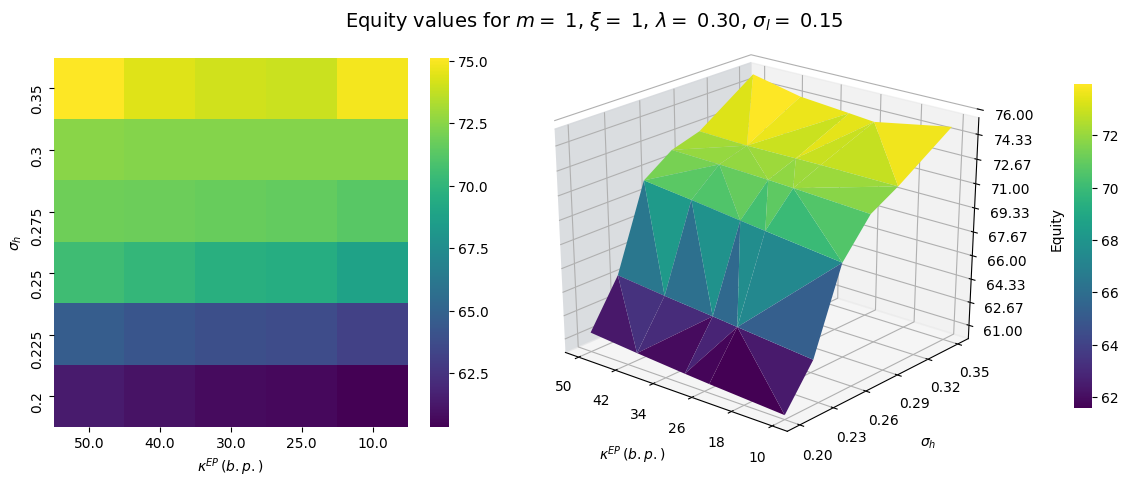

In [31]:
figs_list[1][:equity]

In [402]:
fixed_params = Dict(zip(fig_name_vars, combinations[3]))

ModelPlots.svm_heat_surf_plot_path_fname(pt, 1., xy_list, 
                                                               :equity, fixed_params)

2-element Array{String,1}:
 "/mnt/ide0/home/artur/BondPricing/Julia/Plots/HeatSurf/m_1.0/kappa_sigmah/lambda_0.30"
 "equity_lambda_0.30__m_1.00__mu_b_1.00__xi_1.00__sigmal_0.15"                         

In [396]:
Seaborn.reset_orig()

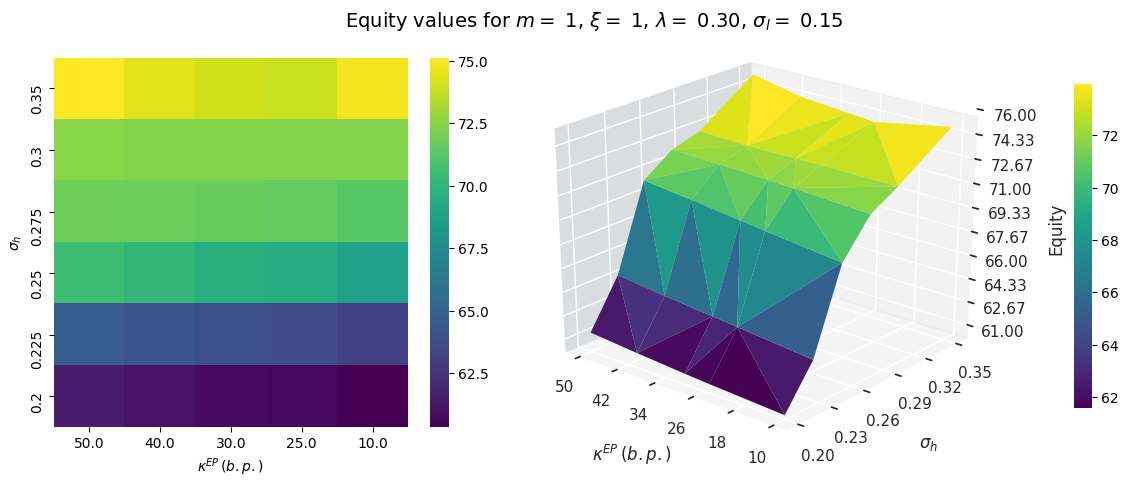

In [397]:
figs_list[1][:equity]

In [ ]:
PyPlot.matplotlib.colors.hex2color("#d5d8dc")

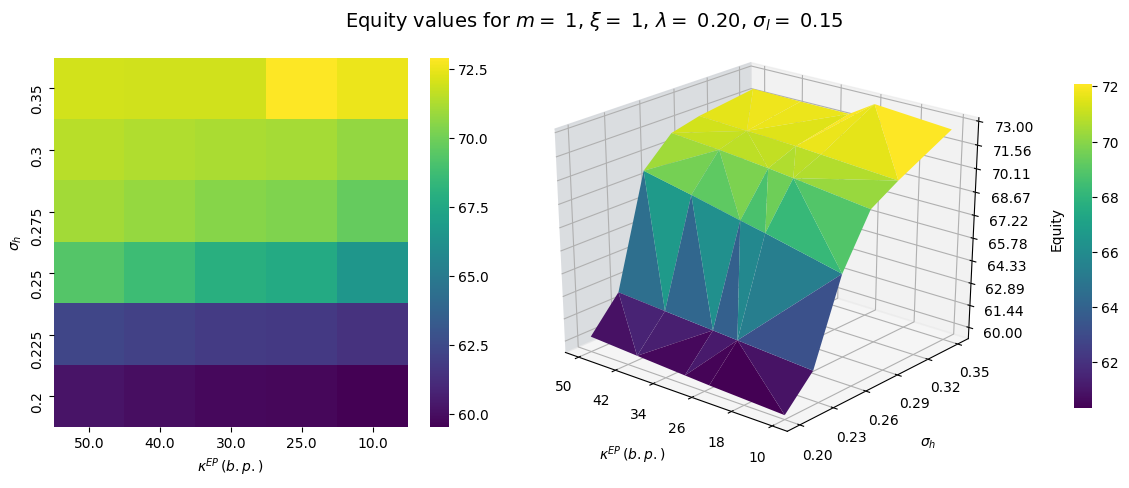

In [335]:
figs_list[2][:equity]

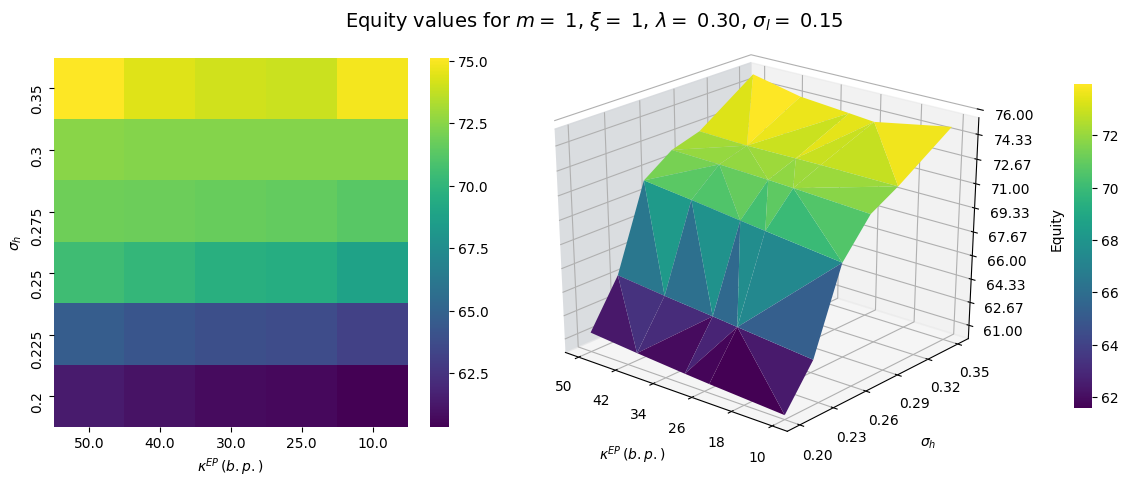

In [336]:
figs_list[3][:equity]

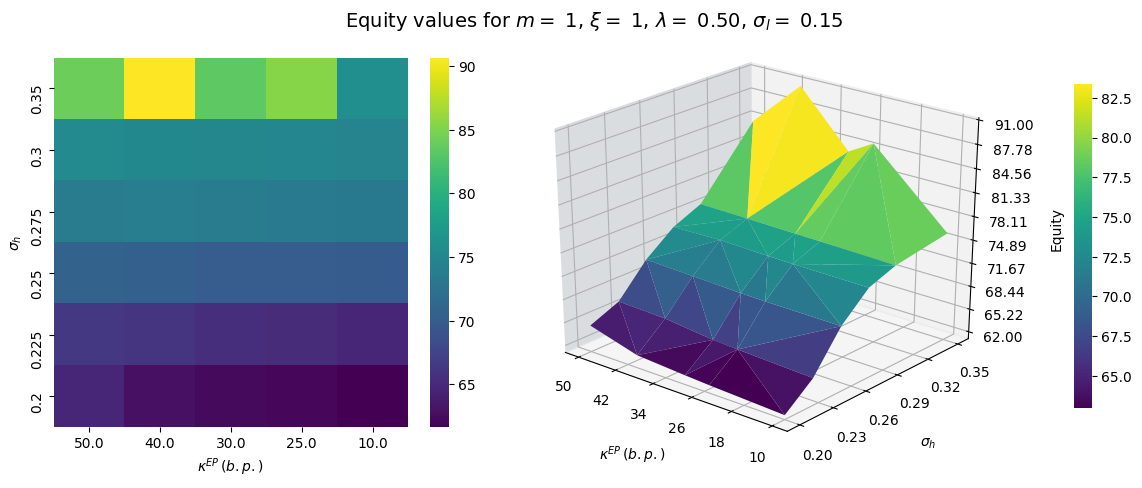

In [337]:
figs_list[4][:equity]

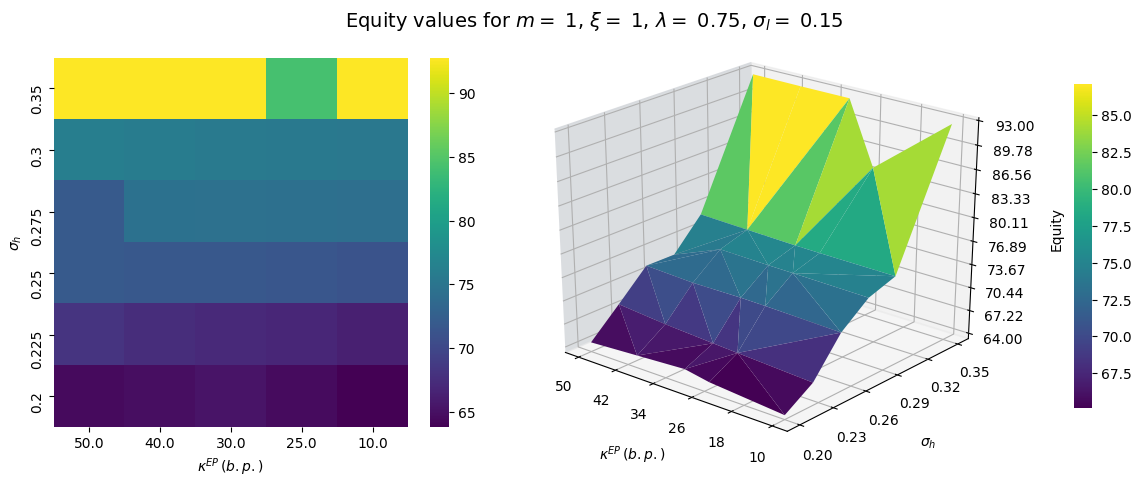

In [339]:
figs_list[5][:equity]

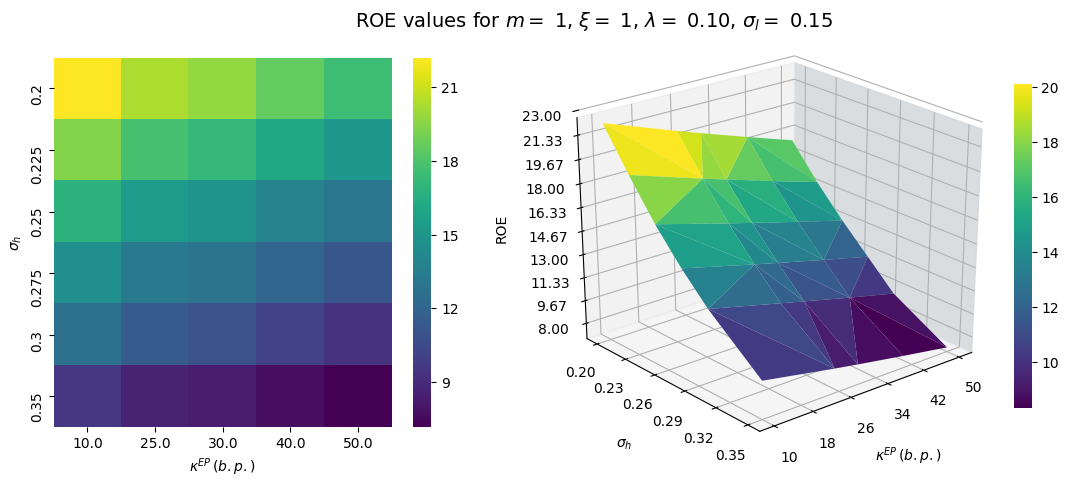

In [341]:
figs_list[1][:ROE]

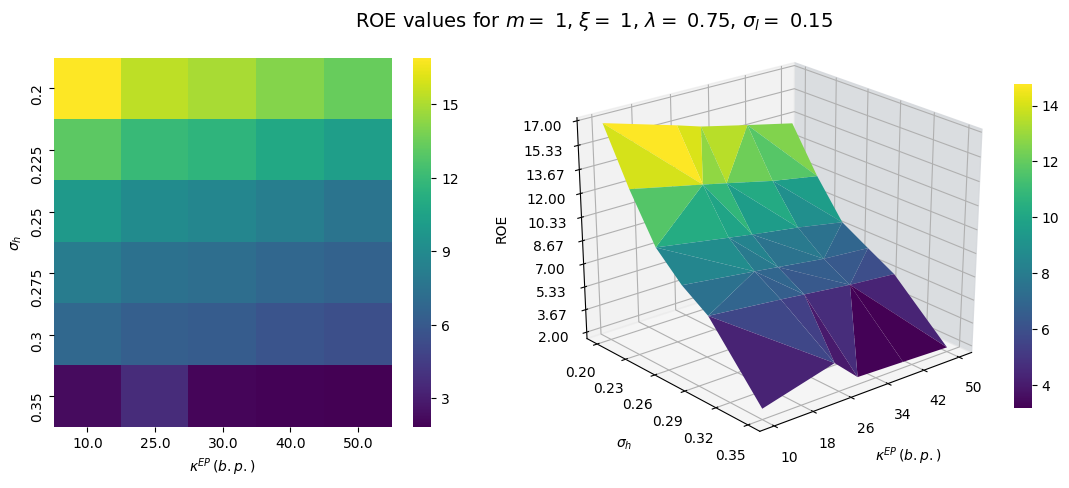

In [340]:
figs_list[5][:ROE]

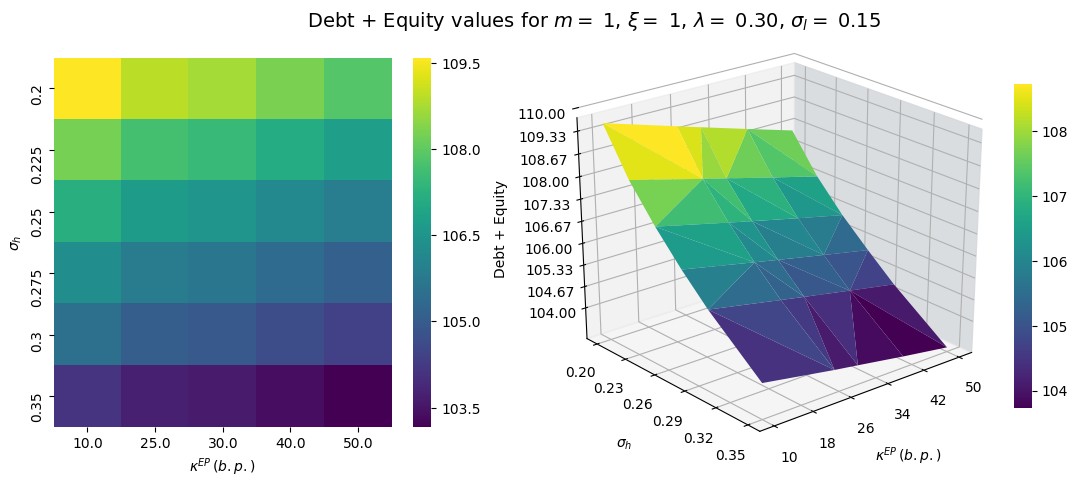

In [325]:
figs_list[1][:firm_value]

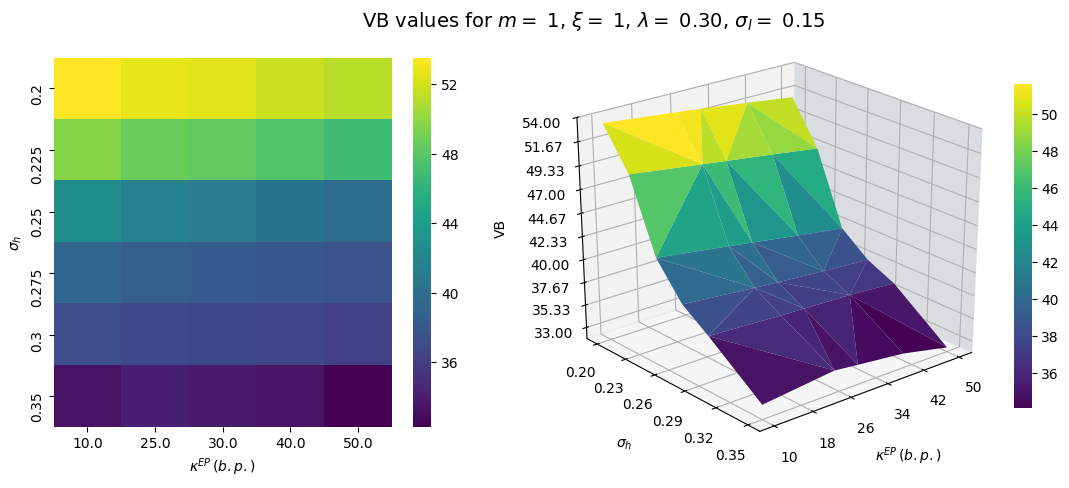

In [326]:
figs_list[1][:vb]

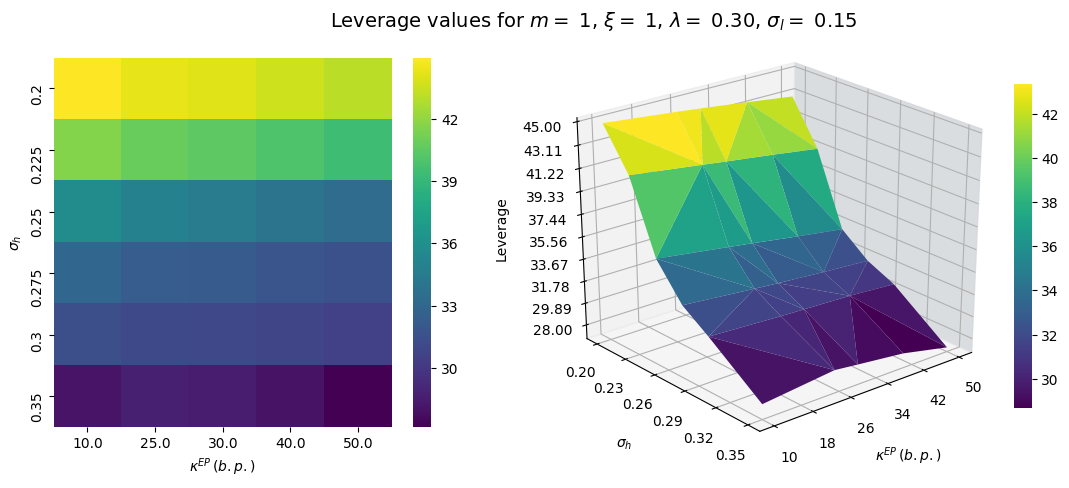

In [327]:
figs_list[1][:leverage]

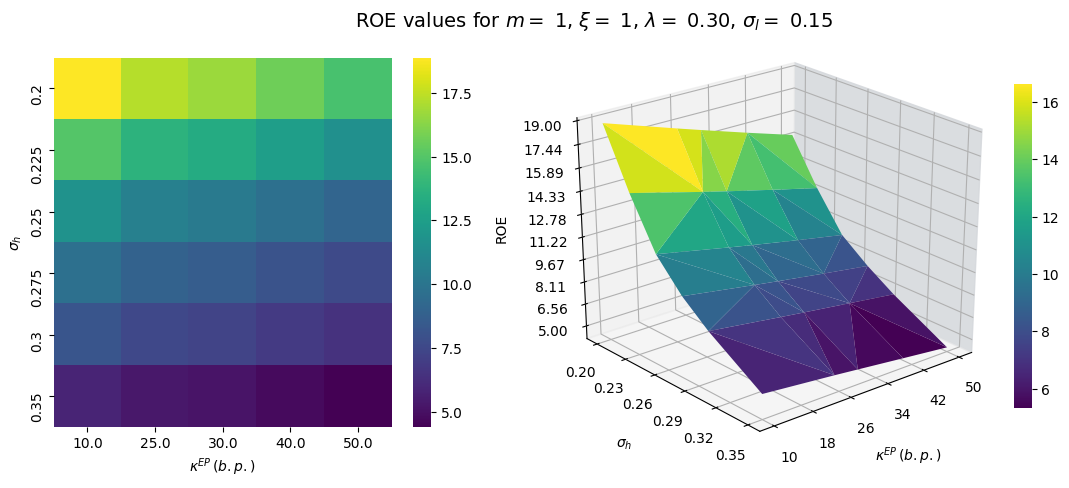

In [328]:
figs_list[1][:ROE]

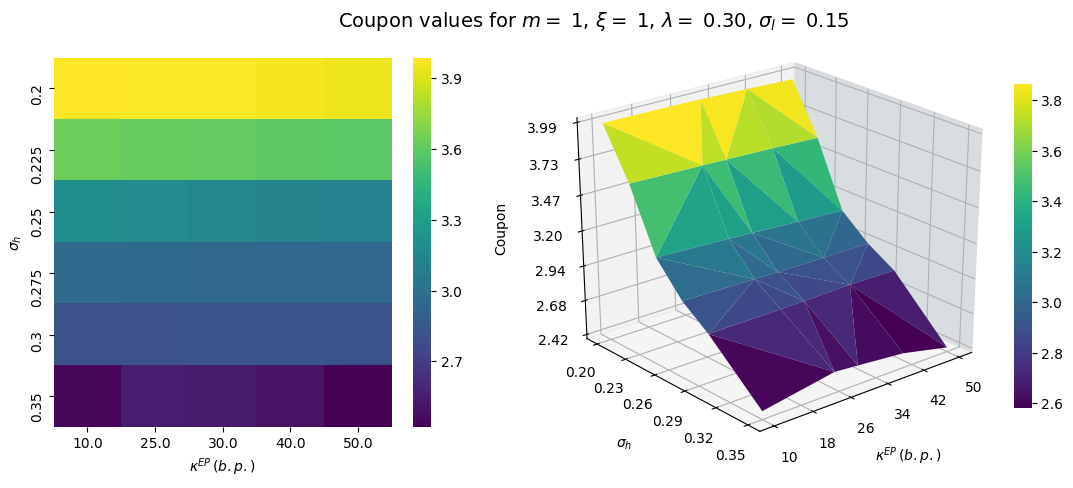

In [329]:
figs_list[1][:c]

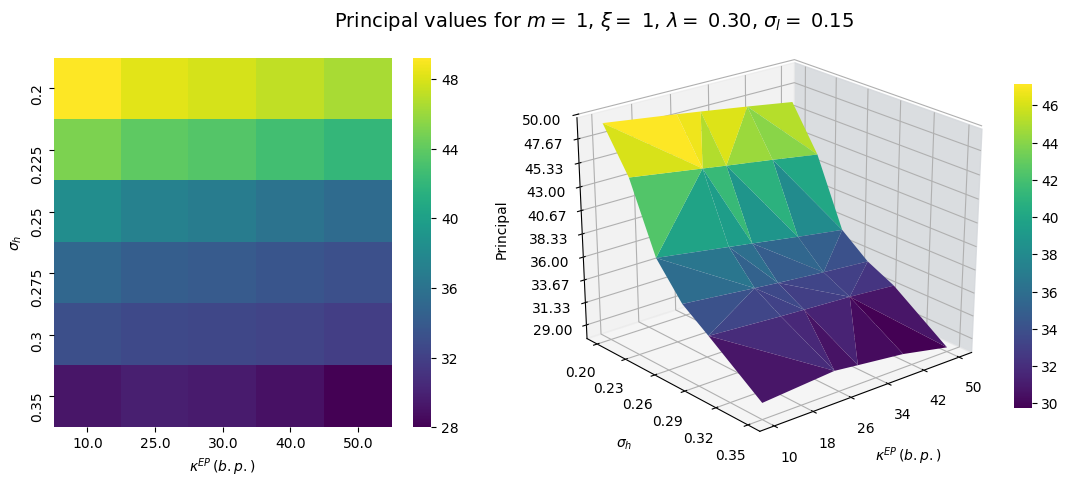

In [330]:
figs_list[1][:p]

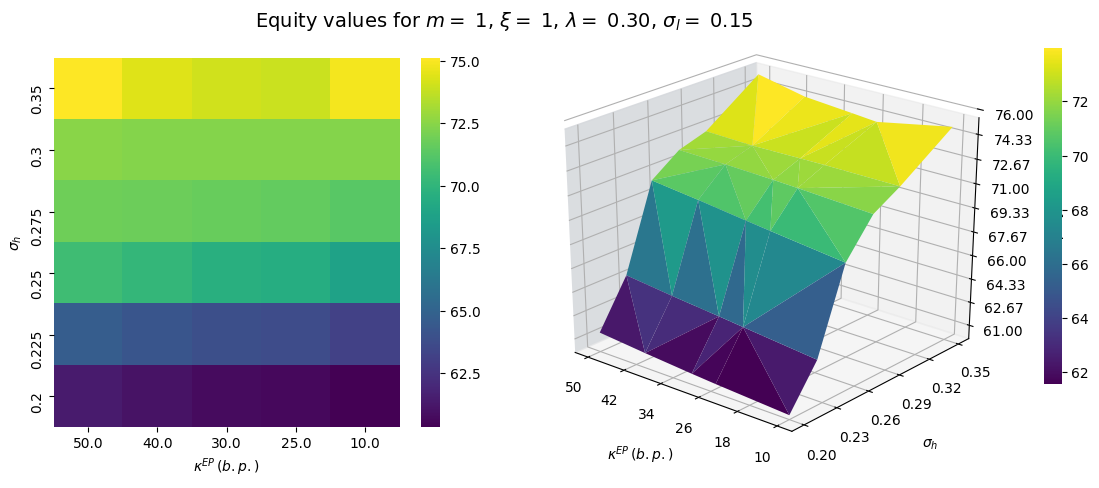

In [155]:

# PyPlot.subplots_adjust(wspace=20.)
figs_list[1][:equity].subplots_adjust(wspace=.15)
figs_list[1][:equity]

In [ ]:
figs_list[1][:equity].subplots_adjust

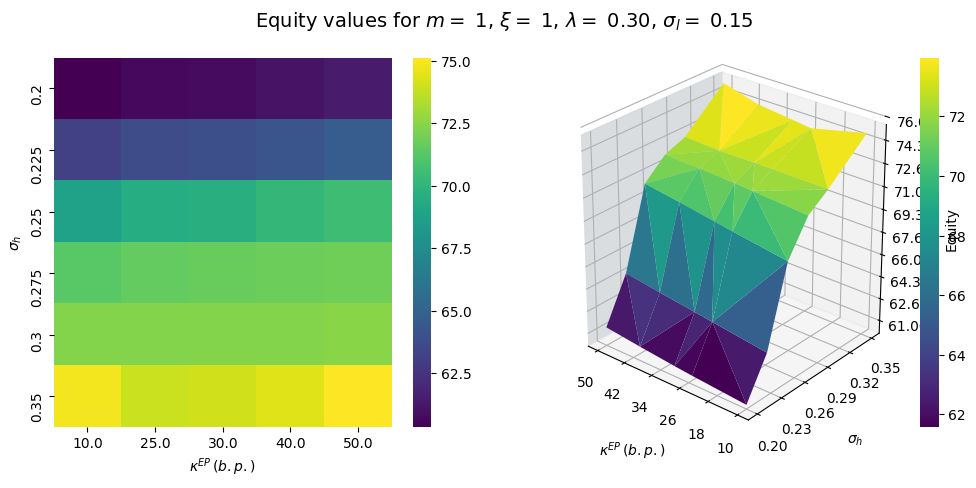

Updating SVM Slice Data


In [254]:
fig_name_vars = [:mu_b, :m, :xi, :lambda, :sigmal]
combinations = ModelPlots.plots_form_combinations(bt, fig_name_vars)

xy_list = [:sigmah, :kappa]
z_vars = [:equity]#, :debt, :c, :p, :vb, :leverage, :ROE]
fig_name_vars = [:mu_b, :m, :xi, :lambda, :sigmal]

graph_dict1 = Dict{Symbol, Any}(:azim => 50., 
                                :heat_reverse_y => false, 
                                :heat_reverse_x => false)

graph_dict2 = Dict{Symbol, Any}(:azim => -50., 
                                :heat_reverse_y => false, 
                                :heat_reverse_x => false)

# using3D()
figs_list = []
for comb in [combinations[3]]
    fixed_params = Dict(zip(fig_name_vars, comb))
    pt = ModelPlots.set_svm_surf(pt, fixed_params)
    
    res = Dict()
    for z in z_vars
        graph_dict = graph_dict1
        if z == :equity
            graph_dict = graph_dict2
        end
        
#         tmp = PyPlot.figure("pyplot_surfaceplot", figsize=PyPlot.figaspect(.4), facecolor="w")
        tmp = ModelPlots.svm_plot_heatmap_surf(pt, xy_list, z, fixed_params,
                                               heat_reverse_x=graph_dict[:heat_reverse_x],
                                               heat_reverse_y=graph_dict[:heat_reverse_y],
                                               elev=25., azim=graph_dict[:azim])
        get!(res, z, tmp)
    end
    
    push!(figs_list, res)
end

In [84]:
pt.svm_data[pt.svm_data[:m_comb_num] .==131, :]

,comb_num,m,m_comb_num,gross_delta,delta,iota,kappa,lambda,sigmah,sigmal,mu_b,c,p,vb,cvml_vb,cvmh_vb,debt_diff,eq_deriv,eq_min_val,sg_debt,debt,sg_equity,equity,firm_value,leverage,ROE,V0,r,alpha,pi,xi,abs_debt_diff,debt_per_diff,abs_debt_per_diff,eq_deriv_min_val,eq_negative,eq_vb
,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Float64
1,131,1.0,131,0.02,0.02,0.0,0.001,0.2,0.35,0.15,1.0,2.58446,31.0458,35.1997,32.6542,31.9,-0.0110526,0.000408183,0.00191647,31.0458,31.0347,73.509,73.5037,104.538,29.6874,6.58077,100.0,0.08,0.6,0.27,1.0,0.0110526,-0.000356011,0.000356011,0.000408183,false,0.0


In [83]:
comb_num = 136
jlSlice = DataFrames.DataFrame(pt.svm_data[pt.svm_data[:comb_num] .== comb_num, :])

,comb_num,m,m_comb_num,gross_delta,delta,iota,kappa,lambda,sigmah,sigmal,mu_b,c,p,vb,cvml_vb,cvmh_vb,debt_diff,eq_deriv,eq_min_val,sg_debt,debt,sg_equity,equity,firm_value,leverage,ROE,V0,r,alpha,pi,xi,abs_debt_diff,debt_per_diff,abs_debt_per_diff,eq_deriv_min_val,eq_negative,eq_vb
,Int64,Float64,Int64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Float64
1,136,1.0,136,0.02,0.02,0.0,0.001,0.3,0.35,0.15,1.0,2.44479,29.1548,33.2226,30.6482,29.9535,0.0105439,0.000137632,0.00175302,29.1548,29.1654,74.9582,74.9607,104.126,28.0097,5.82488,100.0,0.08,0.6,0.27,1.0,0.0105439,0.000361651,0.000361651,0.000137632,false,0.0


In [88]:
m_comb_num = 131
sbt, svm = Batch.get_bt_svm(;m=1., m_comb_num=m_comb_num,
                            display_msgs=true)

svm.c = 2.74225 # jlSlice[1, :c]
svm.p = 33.8421 # jlSlice[1, :p]
vbl = 38.2517 # jlSlice[1, :vb]
EqFinDiff.eq_fd(svm, vbl)

Setting parameter dictionary using (m, m_comb_num) ID pair...
Batch object exists: true
Loading SVM object...
Unable to load batch object file.
Batch Object is incompatible! Loading surfaces only instead.
Setting initial vbl value to NaN
Setting initial vbh value to NaN
Setting initial c value to NaN
Setting initial p value to NaN
Interpolating Bond Pricing Surfaces...
  0.221239 seconds (811.43 k allocations: 137.114 MiB, 16.43% gc time)
Interpolating bond pricing surfaces...
  0.197156 seconds (811.42 k allocations: 137.112 MiB, 11.98% gc time)
Computing Equity Vmax
Vmax: 125.0
phi0: -25.010545018477302
phi1: 0.9999999999999998
pv_rfdebt: 33.84260619108875
debt_abs_per_diff: 1.7371043609793383e-9
eq_abs_per_diff: 0.0009401265670636926
Equity Vmax: 760.1758678463076
 
eq_max: 735.1653219967454
eq_vbl: 0.0
Computing Constant Volatility Equity Values
Finished computing Constant Volatility Equity Values
Time to compute Constant Volatility Equity Values: 0.008414983749389648
 
Shape of Ga

,ROE,V0,alpha,c,debt,delta,eq_deriv,eq_deriv_min_val,eq_min_val,eq_negative,eq_vb,equity,firm_value,gross_delta,iota,kappa,lambda,leverage,m,mu_b,p,pi,r,sigmah,sigmal,vb,xi
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Bool,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,6.48592,100.0,0.6,2.74225,33.7871,0.02,-0.0544879,-0.0544879,-0.00205447,false,0.0,70.5074,104.295,0.02,0.0,0.001,0.2,32.3958,1.0,1.0,33.8421,0.27,0.08,0.35,0.15,38.2517,1.0


In [ ]:
## xy_list = [:sigmah, :kappa]
z_var = :firm_value
xyz, grid_x, grid_y, grid_z, var_axes = ModelPlots.svm_interp_smooth_surface(pt, 
                                                                             fixed_params, 
                                                                             z_var)

In [102]:
m = unique(pt._svm_surf[:m])[1]
graphs_path, file_name = ModelPlots.svm_heat_surf_plot_path_fname(pt, m, xy_list, z_var, 
                                                                  fixed_params)

2-element Array{String,1}:
 "/mnt/ide0/home/artur/BondPricing/Julia/Plots/HeatSurf/m_1.0/kappa_sigmah/lambda_0.20"
 "firm_value_lambda_0.20__m_1.00__mu_b_1.00__xi_1.00__sigmal_0.15"                     

┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = #svm_plot_heatmap_surf#60(::Bool, ::Float64, ::Float64, ::Float64, ::String, ::Bool, ::Bool, ::Bool, ::Bool, ::Bool, ::typeof(Main.ModelPlots.svm_plot_heatmap_surf), ::Main.ModelPlots.PlotStruct, ::Figure, ::Array{Symbol,1}, ::Symbol, ::Dict{Symbol,Float64}) at _svm_plot_methods.jl:375
└ @ Main.ModelPlots /home/artur/BondPricing/Julia/modules/ModelPlots/_svm_plot_methods.jl:375
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = #svm_plot_surface#38(::String, ::Bool, ::Bool, ::Float64, ::Float64, ::Float64, ::Function, ::Main.ModelPlots.PlotStruct, ::PyCall.PyObject, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Symbol,1}, ::Symbol, ::Dict{Symbol,Float64}) at _svm_plot_methods.jl:244
└ @ Main.ModelPlots /home/artur/BondPricing/Julia/modu

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = #svm_plot_surface#38(::String, ::Bool, ::Bool, ::Float64, ::Float64, ::Float64, ::Function, ::Main.ModelPlots.PlotStruct, ::PyCall.PyObject, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Symbol,1}, ::Symbol, ::Dict{Symbol,Float64}) at _svm_plot_methods.jl:269
└ @ Main.ModelPlots /home/artur/BondPricing/Julia/modules/ModelPlots/_svm_plot_methods.jl:269
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = #svm_plot_surface#38(::String, ::Bool, ::Bool, ::Float64, ::Float64, ::Float64, ::Function, ::Main.ModelPlots.PlotStruct, ::PyCall.PyObject, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Symbol,1}, ::Symbol, ::Dict{Symbol,Float64}

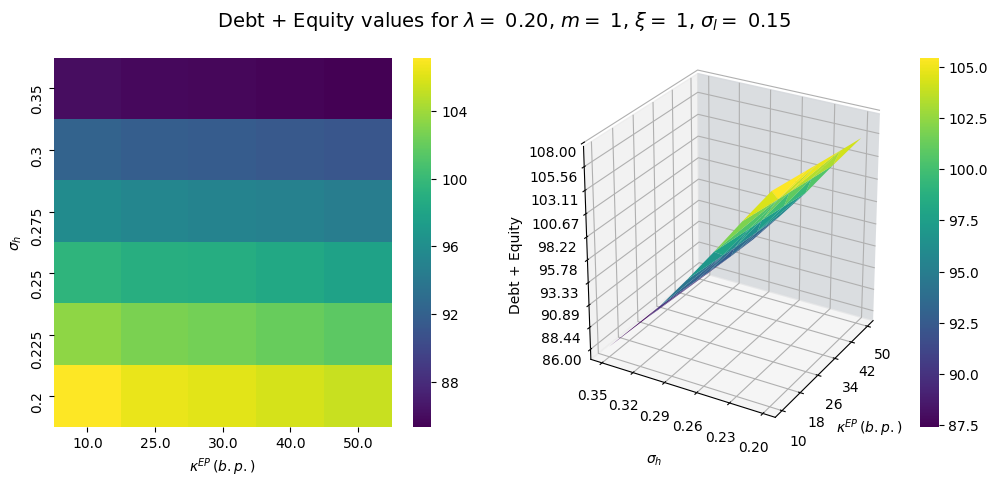

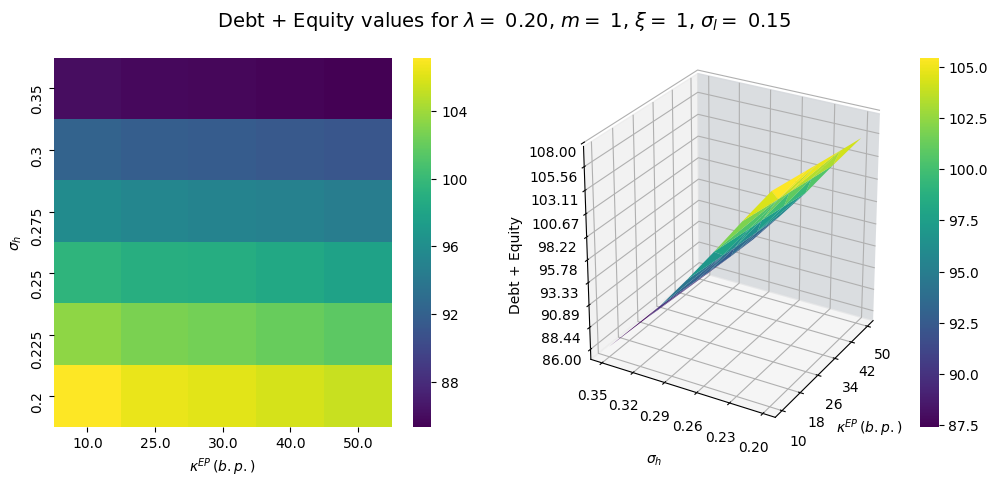

In [23]:
using3D()
fig = PyPlot.figure("pyplot_surfaceplot", figsize=PyPlot.figaspect(.4), facecolor="w")
fig = ModelPlots.svm_plot_heatmap_surf(pt, fig, xy_list, z_var, fixed_params)

# CVM vs SVM Plots

## Market Illiquidity - Transaction Costs

In [814]:
main_path = "/home/artur/BondPricing"
module_path = string(main_path, "/", "Julia/modules/")
modls = ["Batch", "ModelObj", "AnalyticFunctions", 
         "BondPrInterp", "EqFinDiff", "ModelPlots"]
for modl in modls
    include(string(joinpath(module_path, modl), "/", modl, ".jl"))
end

In [816]:
# Plots.plotlyjs()
# Plots.pyplot()
# Plots.plot(background_color="white")

#     #  Symbol[:auto, :solid, :dash, :dot, :dashdot, :dashdotdot]
#     svmlinestyles = [:solid, :dot, :dashdot]
#     cvmlinestyles = [:solid,  :dot, :dashdot]
                
# #     Symbol[:none, :auto, :circle, :rect, :star5, :diamond, 
# #            :hexagon, :cross, :xcross, :utriangle, :dtriangle, 
# #            :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, 
# #            :star4, :star6, :star7, :star8, :vline, :hline, :+, :x]
#     svmmarkers = [:none, :diamond, :star4]
#     cvmmarkers = [:cross, :rtriangle, :octagon]


#         ax.plot(svm_slice[xvar], svm_slice[yvar],
#                     linecolor="blue", 
#                     linewidth=1,
#                     linestyle=svmlinestyles[i],
#                     seriestype=:line,
#                     markershape=svmmarkers[i], 
#                     markersize=3, label=svm_label,
#                     contour_labels=true)

#     Plots.title!(plot_title)

# fig[:dpi] = 300
# fig[:size]=(900, 500)

## Market Illiquidity - Transaction Costs

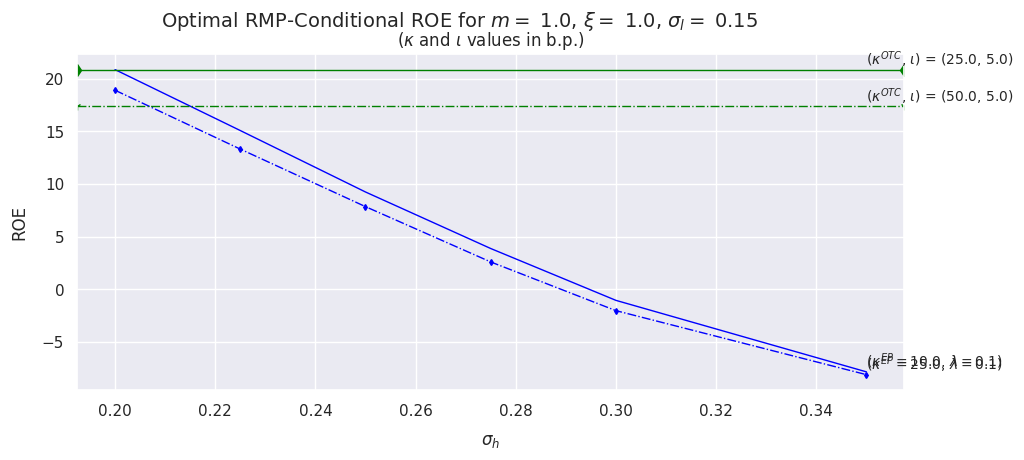

Setting parameter dictionary using (m, m_comb_num) ID pair...
Setting parameter dictionary using unique combination ID...


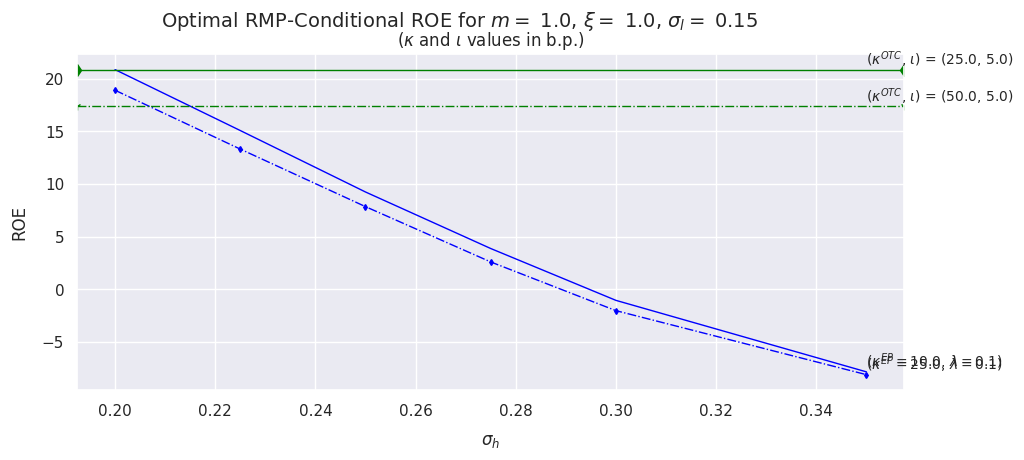

In [817]:
sbt = Batch.get_bt(; model="svm", m=1., m_comb_num=1)
cbt = Batch.get_bt(; model="cvm", comb_num=1)

cvmls = [ ]
for i in [25, 26]
    tmp = cbt.bp.df[.&(cbt.bp.df[:m].==1., cbt.bp.df[:m_comb_num].== i), :]
    cols = [x for x in names(tmp) if !(x in [:comb_num, :m_comb_num, :lambda, :sigmah])]
    push!(cvmls, Dict{Symbol, Float64}(cols .=> [tmp[1, var] for var in cols] ))
end

svmls = [ ]
for i in [1, 2]
    tmp = sbt.bp.df[.&(sbt.bp.df[:m].==1., sbt.bp.df[:m_comb_num].== i), :]
    cols = [x for x in names(tmp) if !(x in [:comb_num, :m_comb_num, :sigmah])]
    push!(svmls, Dict{Symbol, Float64}(cols .=> [tmp[1, var] for var in cols] ))
end

pardict = Dict("svm" => svmls, 
               "cvm" => cvmls)

fPN = string(sbt.dfn.main_dir, "/Graphs/Comparison")
                        
fig = ModelPlots.cvm_vs_svm_plotfun(pt, :ROE, pardict; plot_vlines=false, figPath=fPN)

## Risk-Management Costs

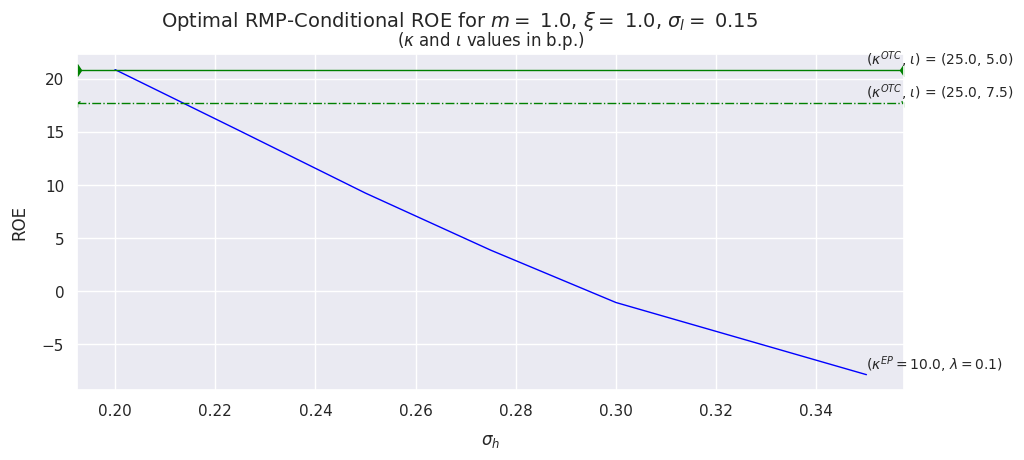

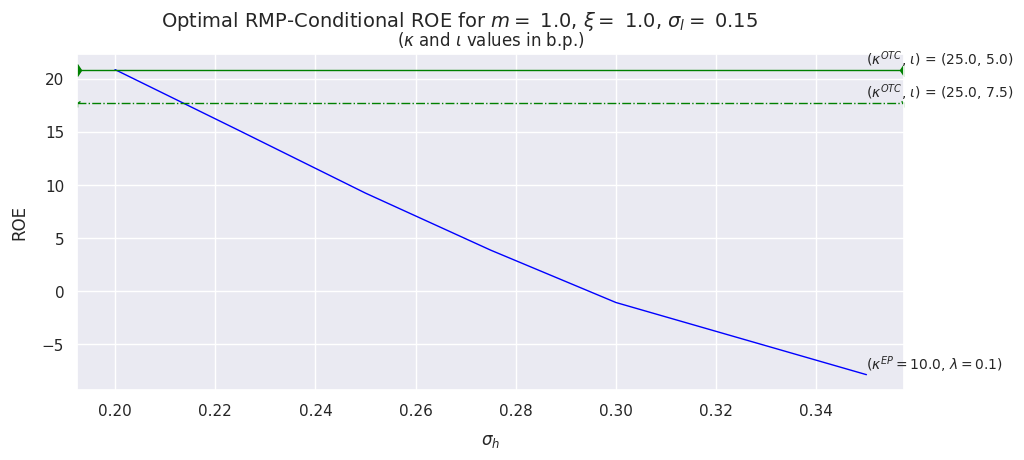

In [819]:
cvmls = [ ]
for i in [25, 29]
    tmp = cbt.bp.df[.&(cbt.bp.df[:m].==1., cbt.bp.df[:m_comb_num].== i), :]
    cols = [x for x in names(tmp) if !(x in [:comb_num, :m_comb_num, :lambda, :sigmah])]
    push!(cvmls, Dict{Symbol, Float64}(cols .=> [tmp[1, var] for var in cols] ))
end

svmls = [ ]
for i in [1]
    tmp = sbt.bp.df[.&(sbt.bp.df[:m].==1., sbt.bp.df[:m_comb_num].== i), :]
    cols = [x for x in names(tmp) if !(x in [:comb_num, :m_comb_num, :sigmah])]
    push!(svmls, Dict{Symbol, Float64}(cols .=> [tmp[1, var] for var in cols] ))
end

pardict = Dict("svm" => svmls, 
               "cvm" => cvmls)

fPN = string(sbt.dfn.main_dir, "/Graphs/Comparison")
                        
fig = ModelPlots.cvm_vs_svm_plotfun(pt, :ROE, pardict; plot_vlines=false, figPath=fPN)

## Volatility Risk Intensity

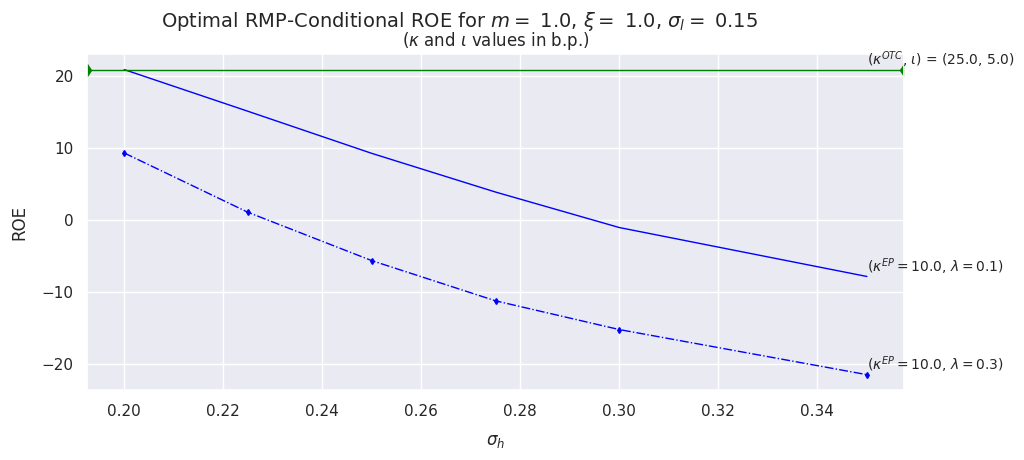

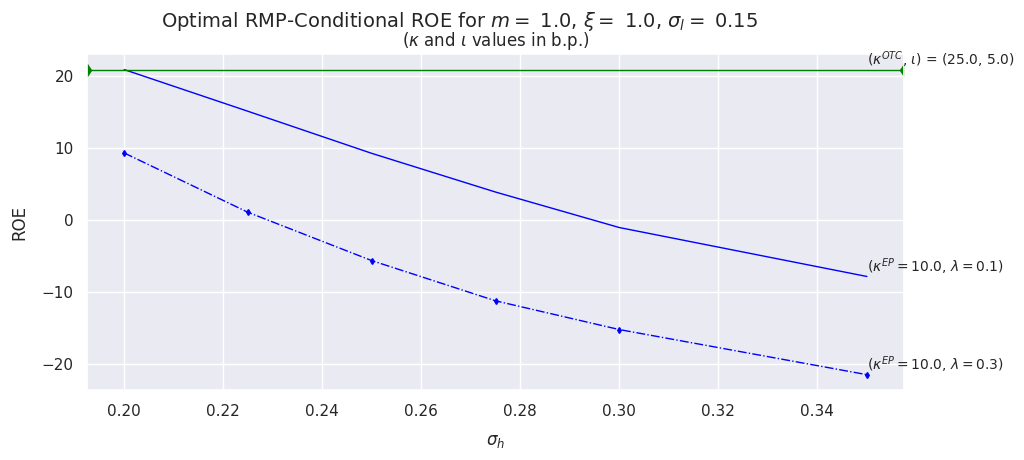

In [820]:
cvmls = [ ]
for i in [25]
    tmp = cbt.bp.df[.&(cbt.bp.df[:m].==1., cbt.bp.df[:m_comb_num].== i), :]
    cols = [x for x in names(tmp) if !(x in [:comb_num, :m_comb_num, :lambda, :sigmah])]
    push!(cvmls, Dict{Symbol, Float64}(cols .=> [tmp[1, var] for var in cols] ))
end

svmls = [ ]
for i in [1, 11]
    tmp = sbt.bp.df[.&(sbt.bp.df[:m].==1., sbt.bp.df[:m_comb_num].== i), :]
    cols = [x for x in names(tmp) if !(x in [:comb_num, :m_comb_num, :sigmah])]
    push!(svmls, Dict{Symbol, Float64}(cols .=> [tmp[1, var] for var in cols] ))
end

pardict = Dict("svm" => svmls, 
               "cvm" => cvmls)

fPN = string(sbt.dfn.main_dir, "/Graphs/Comparison")
                        
fig = ModelPlots.cvm_vs_svm_plotfun(pt, :ROE, pardict; plot_vlines=false, figPath=fPN)

# TRASH

In [ ]:
xy_list = [:sigmah, :kappa]
z_vars = ["firm_value", "equity", "debt", "c", "p", "vb", "leverage", "ROE"]
fig_name_vars = ["mu_b", "m", "xi", "lambda", "sigmal"]

comb_mat = hcat(bt._params_combs...)'
value_lists = 
[[1]] + [param_values_dict[x] for x in fig_name_vars[1:]]
combinations = np.array(np.meshgrid(*value_lists)).T.reshape(-1, len(fig_name_vars))
    
# value_lists = [[1]] + [np.asarray(item[1]) for item in param_values_dict.items() if item[0] in fig_name_vars]
# value_lists = [[1]] + [np.array(param_values_dict[x]) for x in fig_name_vars[1:]]
# combinations = np.array(np.meshgrid(*value_lists)).T.reshape(-1, len(fig_name_vars))

# All variables but equity:
grph_dict1 = Dict("azim" => 50,
                  "order_ascend" => true,
                  "reorder_x" => false)

# Equity:
grph_dict2 = Dict("azim" => -50,
                  "order_ascend" => true,
                  "reorder_x" => false)
